<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/mi_Interpolation_seno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolation of data
- Angel Martin

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#np.random.seed(0)

## 1. Generate data points

In [34]:
x_list = np.linspace(0,2*np.pi,100)
data0 = np.array([x_list, np.sin(x_list)])
data = np.array([data0[0]  , data0[1]])

In [5]:
print(x_list)

[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]


In [17]:
print(data0[0])

[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]


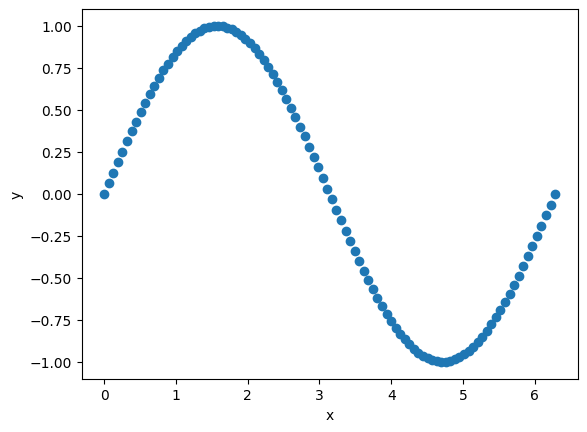

In [35]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[0], data[1])

## 2. Fitting a model function

Finding parameters of a model function such that error is minimized.

### 2.1 Define model function

We consider a polynomial: \\( f(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3\\)

In [19]:
def polinomialModel(x, a):
  return a[0]+a[1]*x+a[2]*x**2+a[3]*x**3

Let's test our new function

[-0.70728218  0.15076992  0.65724615  0.91310068]


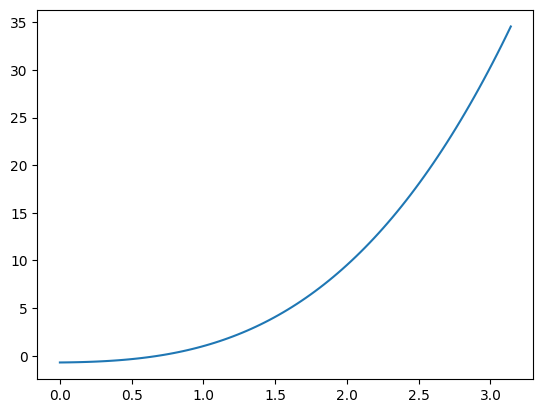

In [29]:
# Starting values for the coefficients
a = 2*np.random.rand(4)-1
print(a)

plt.plot(x_list, polinomialModel(x_list,a))

### 2.2 Update coefficients to reduce the error (gradient descent)

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients \\( a_i \\) will be updated along the gradient direction of the error function \\( \nabla_{\vec{a}} \Delta\\). The gradient consists of elements \\( \frac{\partial}{\partial a_k} \Delta = 2 \sum_{i=1}^n \left(f(x_i)-y_i\right) \frac{\partial}{\partial a_k}f(x_i) = 2 \sum_{i=1}^n \left(f(x_i)-y_i\right) x_i^{k}\\)

Remember: \\( \Delta = \sum_{i=1}^n \left(f(x_i)-y_i\right)^2 = \sum_{i=1}^n \left(a_0 + a_1 x_i + a_2 x_i^2 + \dots + a_n x_i^n-y_i\right)^2 \\)

In [8]:
#Esta funcion necesita modificarse para incluir k
#def errorFitGradient(f,coefficients,data):
# return 2*sum((f(data[0,:],coefficients) - data[1,:])*data[0,:]**k)

In [21]:
def errorFitGradient(f,coefficients,data):
  return 2 * np.array([
      np.sum((f(data[0,:],coefficients) - data[1,:])*data[0,:]**k)
    for k in range(4)])

In [36]:
errorFitGradient(polinomialModel, a, data)

array([  -445.09584874,  -2442.10804949, -13584.79817977, -76489.50942954])

### 2.3 Loop for the actual fitting

In [37]:
iterations = 100000
# learning rate
h = 0.00001

In [38]:
for i in range(iterations):
  a = a - h * errorFitGradient(polinomialModel,a, data)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-21-f6acafe90efb>:2: RuntimeWarning: overflow encountered in multiply
  return 2 * np.array([
<ipython-input-19-489616bd711f>:2: RuntimeWarning: invalid value encountered in multiply
  return a[0]+a[1]*x+a[2]*x**2+a[3]*x**3


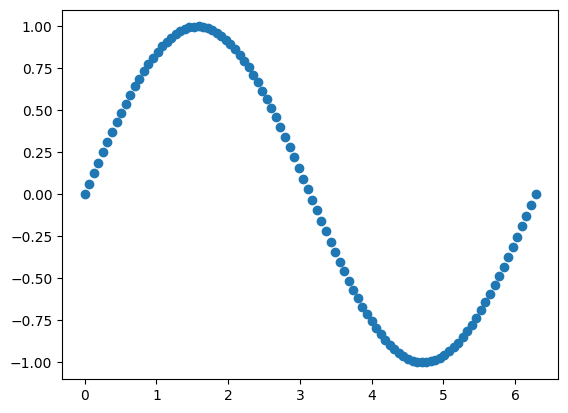

In [39]:
plt.scatter(data[0], data[1])
plt.plot(x_list, polinomialModel(x_list,a))

\\( f(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3\\) with parameters:

In [26]:
print(a)

[ 0.22688435  0.32564603  0.29179993 -0.13699197]
